In [9]:
import os.path as op
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
from scipy.stats import zscore

## Check if FOOOFs PSD
Make sure that the PSD in the fooof object (.power_spectrum) corresponds to the log scaled PSD from Welch objects.

In [3]:
welch_fname = '/home/hyruuk/DATA/saflow/bids/derivatives/welch_1022_sensor_8trials/sub-04/meg/sub-04_task-gradCPT_run-02_meg.pkl'
fooof_fname = '/home/hyruuk/DATA/saflow/bids/derivatives/fooof_1022_knee_sensor_8trials/sub-04/meg/sub-04_task-gradCPT_run-02_meg.pkl'
fooof_magic_fname = '/home/hyruuk/DATA/saflow/bids/derivatives/fooof_1022_knee_sensor_8trials/sub-04/meg/sub-04_task-gradCPT_run-02_meg_magic.pkl'


In [4]:
with open(welch_fname, 'rb') as f:
    welch = pkl.load(f)
with open(fooof_fname, 'rb') as f:
    fooof = pkl.load(f)
with open(fooof_magic_fname, 'rb') as f:
    fooof_magic = pkl.load(f)

/tmp/ipykernel_22388/363609220.py:4: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  fooof = pkl.load(f)


In [58]:
welch['data'].shape
psd_welch = welch['data'][0,0,:]


In [6]:
for chan_idx in range(270):
    fm = fooof['IN_fooofs'].get_fooof(chan_idx)
    print(f'Parameters for chan {chan_idx} : Knee = {fm.aperiodic_params_[1]}, Offset = {fm.aperiodic_params_[0]}, Slope = {fm.aperiodic_params_[2]}, R2 = {fm.r_squared_}')

Parameters for chan 0 : Knee = 8.690056849750503, Offset = -26.13045666280261, Slope = 1.4268288834148595, R2 = 0.9879466706941831
Parameters for chan 1 : Knee = 11.56233118491306, Offset = -25.931278804558957, Slope = 1.510248494958026, R2 = 0.9905855284584694
Parameters for chan 2 : Knee = 11.12456490494404, Offset = -25.817094912310726, Slope = 1.545871321131989, R2 = 0.9863196243476338
Parameters for chan 3 : Knee = 16.43189761860349, Offset = -25.57993330366061, Slope = 1.6513255198011718, R2 = 0.9904304689038257
Parameters for chan 4 : Knee = 41.95765449775659, Offset = -25.234975155265275, Slope = 1.8638092566177393, R2 = 0.9918692843679774
Parameters for chan 5 : Knee = 64.84984711697744, Offset = -24.99954839513, Slope = 1.998706710931215, R2 = 0.9928571458609816
Parameters for chan 6 : Knee = 69.05404588324527, Offset = -24.830007528498804, Slope = 2.0298743330050764, R2 = 0.9941032747934441
Parameters for chan 7 : Knee = 15.868798422263085, Offset = -25.621821376127723, Slop

In [61]:
psd_fooof_magic = fooof_magic[0]['psd_raw']


#psd_fooof_magic = psd_fooof_magic[fooof_magic[0]['freq_bins'] == new_freqs]

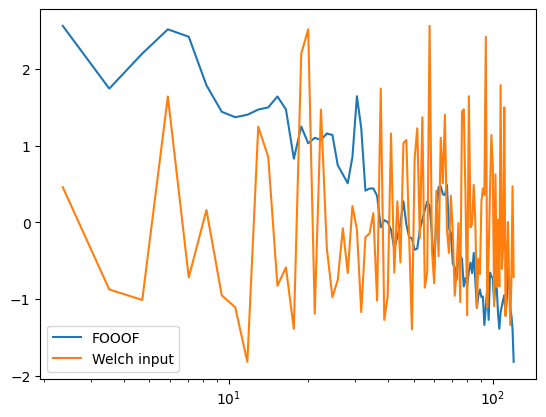

In [71]:
fig, ax = plt.subplots()
ax.set_xscale('log')

plt.plot(fooof_magic[0]['freq_bins'], zscore(psd_fooof_magic), label='FOOOF')
plt.plot(new_freqs, zscore(psd_welch_trimmed_logged), label='Welch input')
plt.legend()
plt.show()

In [66]:

new_freqs = welch['freq_bins'][welch['freq_bins'] > 2]
new_freqs = new_freqs[new_freqs < 120]
psd_welch_trimmed_top = psd_welch[welch['freq_bins'] > 2]
psd_welch_trimmed_bot = psd_welch[welch['freq_bins'] < 120]

psd_welch_trimmed = np.array(list(set(psd_welch_trimmed_top) & set(psd_welch_trimmed_bot)))

In [70]:
psd_welch_trimmed_logged = np.log10(psd_welch_trimmed)